# Autoencoders

In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

## Data Loading

In [36]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('Data/', one_hot=True)

Extracting Data/train-images-idx3-ubyte.gz
Extracting Data/train-labels-idx1-ubyte.gz
Extracting Data/t10k-images-idx3-ubyte.gz
Extracting Data/t10k-labels-idx1-ubyte.gz


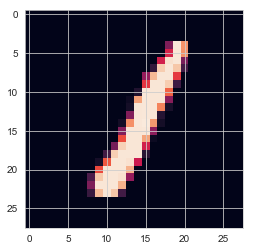

In [35]:
plt.imshow(mnist.train.images[777].reshape(28,28));

## Defining Parameters

In [10]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

he_init = tf.contrib.layers.variance_scaling_initializer()
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

## Defining Placeholders

In [11]:
tf.reset_default_graph()

with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32, shape=[None, num_inputs])

## Defining Layers

In [12]:
from functools import partial

with tf.name_scope('dnn'):
    dense_layer = partial(tf.layers.dense,
                             activation=tf.nn.elu,
                             kernel_initializer=he_init,
                             kernel_regularizer=l2_regularizer)
    hidden1 = dense_layer(X, n_hidden1)
    hidden2 = dense_layer(hidden1, n_hidden2)
    hidden3 = dense_layer(hidden2, n_hidden3)
    outputs = dense_layer(hidden3, n_outputs, activation=None)

## Defining Loss Function

In [13]:
with tf.name_scope('loss'):
    reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([reconstruction_loss] + reg_losses)

## Training Model

In [14]:
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

## Running Model

In [15]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [18]:
n_epochs = 5
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print('\r{}%'.format(100 * iteration // n_batches), end='')
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        print('\r{}'.format(epoch), 'Train MSE:', loss_train)
        
        save_path = saver.save(sess, './Models/tf_autoenconder_example.ckpt')

0 Train MSE: 0.024825381
1 Train MSE: 0.014563838
2 Train MSE: 0.01102877
3 Train MSE: 0.011250622
4 Train MSE: 0.011076929


## Predicting Data

In [30]:
n_test_images = 10

with tf.Session() as sess:
    saver.restore(sess, save_path)
    results = outputs.eval(feed_dict={X:mnist.test.images[: n_test_images]})

INFO:tensorflow:Restoring parameters from ./Models/tf_autoenconder_example.ckpt


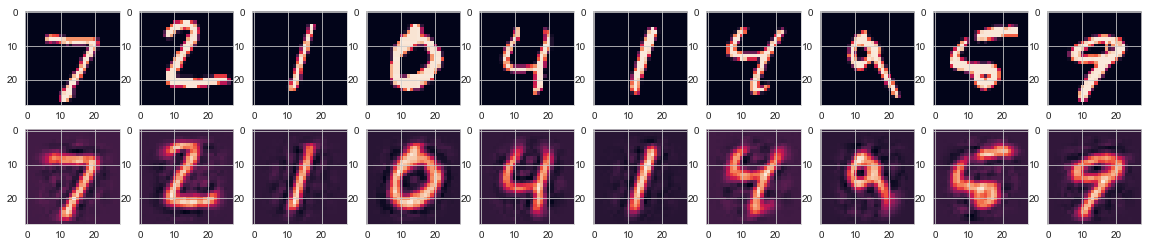

In [31]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(n_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))